<a href="https://colab.research.google.com/github/HoPhuocMinhQuan20104052/HoPhuocMinhQuan/blob/main/Train_AI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.models import load_model
from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_set = train_data.flow_from_directory('/content/drive/MyDrive/Tea Dataset/Train',target_size=(150,150), batch_size=32, class_mode='categorical')


Found 820 images belonging to 8 classes.


In [ ]:
val_set = train_data.flow_from_directory('/content/drive/MyDrive/Tea Dataset/Valid',target_size=(150,150), batch_size=32, class_mode='categorical')


Found 64 images belonging to 8 classes.


In [ ]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3),padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(512,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(8,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 38, 38, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 19, 19, 128)     

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_set,epochs=50,batch_size=128,verbose=1, validation_data=val_set)

Epoch 1/50
26/26 [==============================] - 415s 16s/step - loss: 2.0955 - accuracy: 0.1500 - val_loss: 1.9771 - val_accuracy: 0.1250
Epoch 2/50
26/26 [==============================] - 65s 2s/step - loss: 1.6675 - accuracy: 0.2610 - val_loss: 1.2920 - val_accuracy: 0.4062
Epoch 3/50
26/26 [==============================] - 63s 2s/step - loss: 1.2982 - accuracy: 0.3720 - val_loss: 0.9899 - val_accuracy: 0.5625
Epoch 4/50
26/26 [==============================] - 64s 2s/step - loss: 1.1429 - accuracy: 0.4573 - val_loss: 0.9333 - val_accuracy: 0.6875
Epoch 5/50
26/26 [==============================] - 63s 2s/step - loss: 1.0077 - accuracy: 0.5305 - val_loss: 0.8699 - val_accuracy: 0.5625
Epoch 6/50
26/26 [==============================] - 63s 2s/step - loss: 0.8892 - accuracy: 0.5976 - val_loss: 0.9616 - val_accuracy: 0.5938
Epoch 7/50
26/26 [==============================] - 65s 2s/step - loss: 0.7943 - accuracy: 0.6622 - val_loss: 0.7783 - val_accuracy: 0.6562
Epoch 8/50
26/26 [

In [ ]:
model.save('Tea.h5')


In [ ]:
model_tea=load_model('Tea.h5')

1/1 [==============================] - 0s 15ms/step
Tình trạng lá: Anthracnose


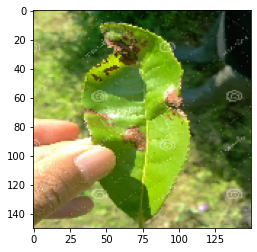

In [ ]:
img = load_img('/content/4.jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_tea.predict(img)
class_name= ['Algal leaf', 'Anthracnose', 'Bird eye spot', 'Brown blight', 'Gray Blight', 'Healthy', 'Red leaf spot','White spot']
a= int(np.argmax(result,axis=1))
print("Tình trạng lá:", class_name[a])